In [104]:
# Materials referred:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

In [34]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from math import sqrt
from sklearn.linear_model import Lasso

In [35]:
# 
data = pd.read_csv("OnlineNewsPopularity.csv")
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [36]:
# check for missing values
for col in data.columns:
    print(col , " : ", data[col].isnull().sum())

url  :  0
 timedelta  :  0
 n_tokens_title  :  0
 n_tokens_content  :  0
 n_unique_tokens  :  0
 n_non_stop_words  :  0
 n_non_stop_unique_tokens  :  0
 num_hrefs  :  0
 num_self_hrefs  :  0
 num_imgs  :  0
 num_videos  :  0
 average_token_length  :  0
 num_keywords  :  0
 data_channel_is_lifestyle  :  0
 data_channel_is_entertainment  :  0
 data_channel_is_bus  :  0
 data_channel_is_socmed  :  0
 data_channel_is_tech  :  0
 data_channel_is_world  :  0
 kw_min_min  :  0
 kw_max_min  :  0
 kw_avg_min  :  0
 kw_min_max  :  0
 kw_max_max  :  0
 kw_avg_max  :  0
 kw_min_avg  :  0
 kw_max_avg  :  0
 kw_avg_avg  :  0
 self_reference_min_shares  :  0
 self_reference_max_shares  :  0
 self_reference_avg_sharess  :  0
 weekday_is_monday  :  0
 weekday_is_tuesday  :  0
 weekday_is_wednesday  :  0
 weekday_is_thursday  :  0
 weekday_is_friday  :  0
 weekday_is_saturday  :  0
 weekday_is_sunday  :  0
 is_weekend  :  0
 LDA_00  :  0
 LDA_01  :  0
 LDA_02  :  0
 LDA_03  :  0
 LDA_04  :  0
 global_su

In [37]:
# check data columns type
data.dtypes

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [38]:
# removing unnecessary columns
data = data.drop(["url"], axis = 1)
data.dtypes

 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       float64
 kw_avg_max                       

In [39]:
# feature normalization function using mean and standard deviation
def feature_normalization(X):
    n = X.shape[1]
    X_norm = X
    X_norm = pd.DataFrame(X_norm)
    mu = np.zeros(n)
    sigma = np.zeros(n)
    
    for i in range(n):
        mu[i] = np.mean(X_norm.iloc[:,i])
        sigma[i] = np.std(X_norm.iloc[:, i])
        X_norm.iloc[:, i] = (X_norm.iloc[:,i] - mu[i])/sigma[i]
        
    return X_norm

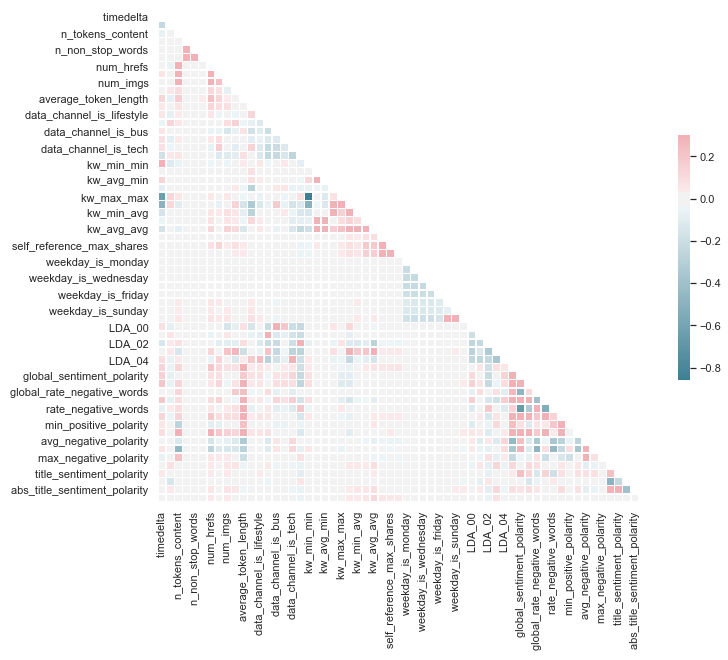

In [40]:
# Correlation plot using seaborn
from string import ascii_letters

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [41]:
# finding out features that are correlated with each other
cols = data.columns
corr = data.corr()
columnsNotNeeded = []
for i in range(len(corr)):
    for j in range(len(corr[cols[i]])):
        if abs(corr[cols[i]][cols[j]]) >= 0.5 and i != j:
            if(i not in columnsNotNeeded):
                print(cols[i], " and ", cols[j], " have corr = ", corr[cols[i]][cols[j]])
                columnsNotNeeded.append(cols[j])

 timedelta  and   kw_min_min  have corr =  0.591198805932309
 timedelta  and   kw_max_max  have corr =  -0.6378239103664511
 n_unique_tokens  and   n_non_stop_words  have corr =  0.9995717371216517
 n_unique_tokens  and   n_non_stop_unique_tokens  have corr =  0.99985151601784
 n_non_stop_words  and   n_unique_tokens  have corr =  0.9995717371216517
 n_non_stop_words  and   n_non_stop_unique_tokens  have corr =  0.9995323282503519
 n_non_stop_unique_tokens  and   n_unique_tokens  have corr =  0.99985151601784
 n_non_stop_unique_tokens  and   n_non_stop_words  have corr =  0.9995323282503519
 average_token_length  and   global_subjectivity  have corr =  0.5976287201040001
 average_token_length  and   rate_positive_words  have corr =  0.5788940295047423
 average_token_length  and   avg_positive_polarity  have corr =  0.5401170166099064
 data_channel_is_entertainment  and   LDA_01  have corr =  0.5993837724656842
 data_channel_is_bus  and   LDA_00  have corr =  0.7746505220379106
 data_ch

In [43]:
columnsNotNeeded = set(columnsNotNeeded)
len(columnsNotNeeded)

39

In [57]:
X = data.iloc[:,0:59]
y = data.iloc[:,-1]

In [58]:
# split data to train and test sets
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
# method to find rmse of a model and define a rmse scorer for optimising parameters using GridSearchCV
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

## Linear Regression Baseline Model

In [59]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
rmse(ytest, lr.predict(Xtest))

12733.61311462909

In [49]:
# picking out only the needed columns
neededColumns = [" n_non_stop_unique_tokens", " num_hrefs", " num_self_hrefs", " num_imgs", " num_videos", 
                ' data_channel_is_lifestyle',
               ' data_channel_is_socmed',
               ' kw_avg_min', ' kw_avg_max', ' kw_avg_avg', ' self_reference_avg_sharess',
                ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
               ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
               ' weekday_is_sunday', 
               ' LDA_03',
               ' global_sentiment_polarity',
                ' rate_positive_words',
               ' rate_negative_words',
               ' title_sentiment_polarity', ' abs_title_subjectivity',
               ' shares']
len(neededColumns)

25

## Linear Regression after filtering out correlated columns

In [50]:
newData = data[neededColumns]
X = newData.iloc[:,0:len(neededColumns)-1]
y = newData.iloc[:,-1]
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
rmse(ytest, lr.predict(Xtest))

12756.854671384097

## Random Forest Baseline model

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
rmse(ytest, rf.predict(Xtest))

/Users/dhivyaslh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


13366.347282904559

## Gradient Boosting Baseline model

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(Xtrain, ytrain)
print("Training Error : ", rmse(ytrain, gb.predict(Xtrain)))
print("Testing Error : ", rmse(ytest, gb.predict(Xtest)))

12823.86646544168

## AdaBoost Baseline model

In [62]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(Xtrain, ytrain)
print("Training Error : ", rmse(ytrain, ab.predict(Xtrain)))
print("Testing Error : ", rmse(ytest, ab.predict(Xtest)))

26309.228073050665

## Ridge Regression Baseline model

In [63]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(Xtrain, ytrain)
print("Training Error : ", rmse(ytrain, rr.predict(Xtrain)))
print("Testing Error : ", rmse(ytest, rr.predict(Xtest)))

12733.202385186662

## Lasso Regression Baseline model

In [64]:
from sklearn.linear_model import Lasso
lsr = Lasso()
lsr.fit(Xtrain, ytrain)
print("Training Error : ", rmse(ytrain, lsr.predict(Xtrain)))
print("Testing Error : ", rmse(ytest, lsr.predict(Xtest)))

/Users/dhivyaslh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


12732.531651248237

## Tuning the Lasso Regression model using GridSearchCV

In [83]:
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

mae = make_scorer(mean_absolute_error, greater_is_better=False)

paramGrid = {'alpha': [0,1, 2,3,5,6,7,8,9, 10]}
tuning = GridSearchCV(estimator =lsr,param_grid = paramGrid, scoring=mae,n_jobs=4,iid=False, cv=5)
tuning.fit(Xtrain,np.array(ytrain).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

/Users/dhivyaslh/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dhivyaslh/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dhivyaslh/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dhivyaslh/an

({'mean_fit_time': array([3.82775168, 3.25002742, 3.25022535, 2.05106783, 0.81870756,
         0.79107342, 0.77128983, 0.76048555, 0.77594242, 0.75766721]),
  'std_fit_time': array([0.03210862, 1.06445784, 1.10169127, 1.43161643, 0.10274833,
         0.11185539, 0.10163848, 0.11886676, 0.09925228, 0.10875528]),
  'mean_score_time': array([0.00457234, 0.00245552, 0.00214143, 0.00503912, 0.00231128,
         0.00213737, 0.00255718, 0.00423822, 0.00223756, 0.00172434]),
  'std_score_time': array([3.81683578e-03, 5.11758100e-04, 5.79382460e-05, 3.87874045e-03,
         5.27326092e-04, 6.81105424e-05, 9.56728486e-04, 3.95481625e-03,
         2.36157376e-04, 6.61454347e-04]),
  'param_alpha': masked_array(data=[0, 1, 2, 3, 5, 6, 7, 8, 9, 10],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'alpha': 0},
   {'alpha': 1},
   {'alpha': 2},
   {'alpha': 3},
   {'alp

In [101]:
lsr = Lasso(alpha=9)
lsr.fit(Xtrain, ytrain)
print("Training Error : ", rmse(ytrain, lsr.predict(Xtrain)))
print("Testing Error : ", rmse(ytest, lsr.predict(Xtest)))

Training Error :  10839.548934317756
Testing Error :  12731.505013625883


In [102]:
lsr = Lasso(alpha=10)
lsr.fit(Xtrain, ytrain)
print("Training Error : ", rmse(ytrain, lsr.predict(Xtrain)))
print("Testing Error : ", rmse(ytest, lsr.predict(Xtest)))

Training Error :  10840.060715742953
Testing Error :  12731.484643450349


## A Lasso Regressor with alpha = 9 gives good training accuracy, but alpha = 10 gives better testing accuracy than 9